# 1. Загрузка данных

In [4]:
# Импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV

In [6]:
data = pd.read_csv('C:/Users/nikka/OneDrive/Рабочий стол/House/train.csv', header=0)

In [8]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2. Предобработка данных

Колонка 'Id' - бесполезный признак, избавимся от нее

In [13]:
data = data.drop(columns = 'Id')

In [15]:
# Определим, в каких колонках есть пропуски и выведем их на экран
col_na = data.columns[data.isna().sum() > 0]
matrix_nan = pd.DataFrame({
    'features': col_na,
    'sum_nan': data[col_na].isna().sum().values,
    'frac_nan': np.round((data[col_na].isna().sum() / len(data)).values, 2)
})

In [16]:
matrix_nan

,features,sum_nan,frac_nan
0,LotFrontage,259,0.18
1,Alley,1369,0.94
2,MasVnrType,872,0.60
3,MasVnrArea,8,0.01
4,BsmtQual,37,0.03
5,BsmtCond,37,0.03
6,BsmtExposure,38,0.03
7,BsmtFinType1,37,0.03
8,BsmtFinType2,38,0.03
9,Electrical,1,0.00


In [17]:
data['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

В столбцах 'Alley', 'PoolQC' и 'MiscFeature' доля пропусков больше 90%

Для столбцов с кол-вом пропуков более 90% - удалим их

In [22]:
data = data.drop(['PoolQC', 'MiscFeature','Alley',
                 'BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2',
                 'BsmtFinSF2','BsmtUnfSF'],
                 axis=1)

Вещественные признаки заполним медианами

In [24]:
num_col_nan = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [25]:
data[num_col_nan] = data[num_col_nan].fillna(data[num_col_nan].median())

Категориальные признаки заполним константой 'NoInform'

In [27]:
cat_col_nan = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [28]:
data[cat_col_nan] = data[cat_col_nan].fillna('NoInform')

In [30]:
# Определим, в каких колонках есть пропуски и выведем их на экран
col_na = data.columns[data.isna().sum() > 0]
matrix_nan = pd.DataFrame({
    'features': col_na,
    'sum_nan': data[col_na].isna().sum().values,
    'frac_nan': np.round((data[col_na].isna().sum() / len(data)).values, 2)
})

In [31]:
matrix_nan

,features,sum_nan,frac_nan
0,Fence,1179,0.81


Пропусков не обнаружено

# 3. Исследовательский анализ данных

Проанализируем признаки из датафрейма

In [34]:
# Зададим колонки для вещественных признаков
num_col_y = ['MSSubClass', 'LotArea', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 
           '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
           'MiscVal', 'SalePrice']

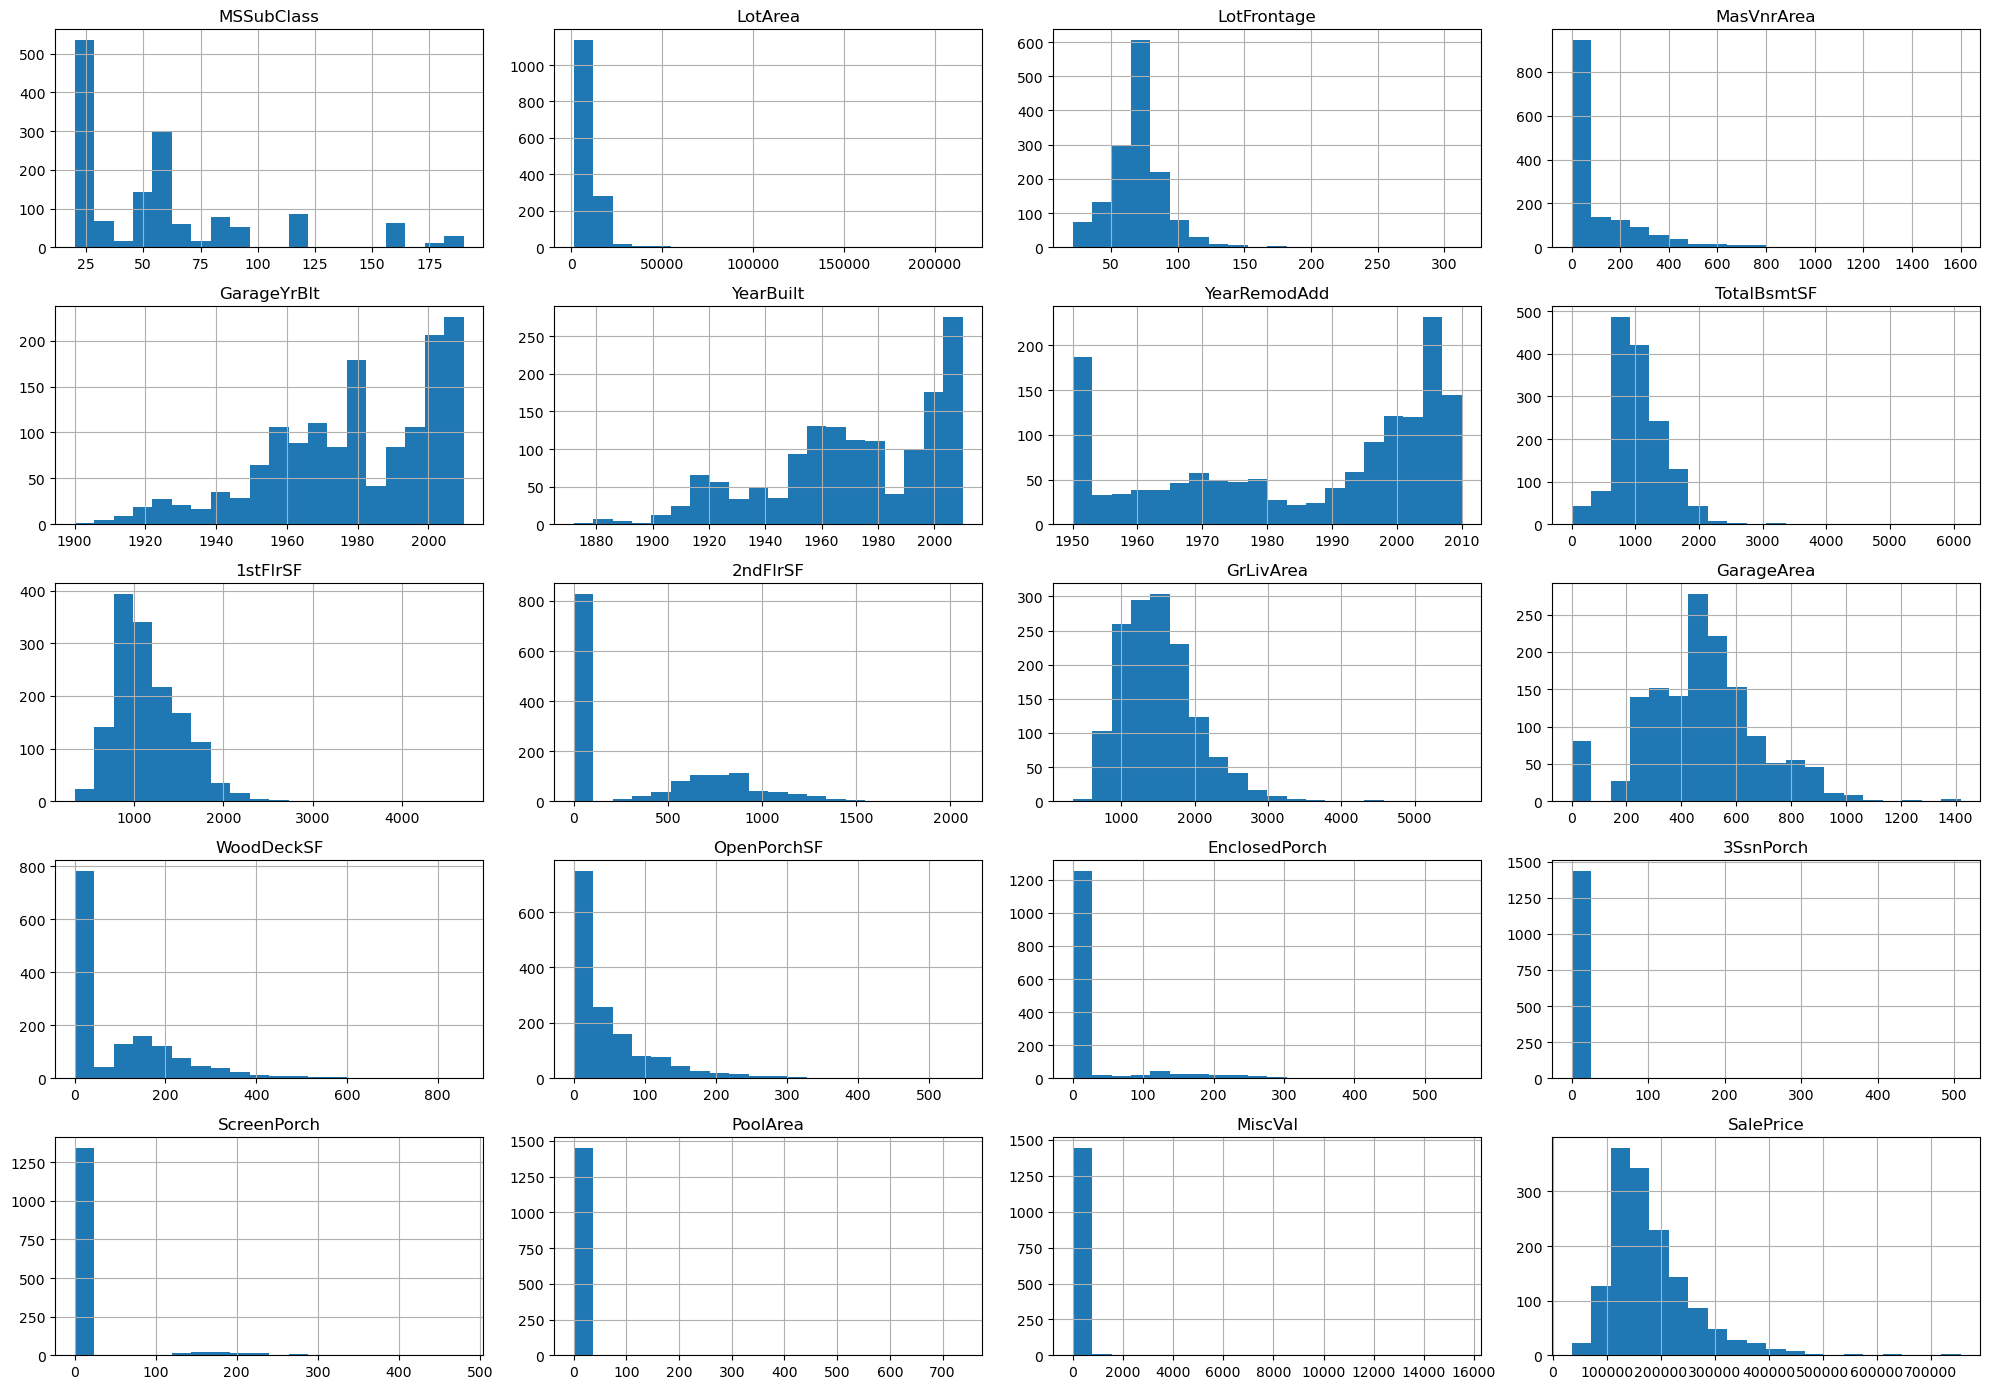

In [35]:
# Построим гистограмы для вещественных признаков
data[num_col_y].hist(figsize=(20, 14), bins=20, grid=True)
plt.tight_layout()
plt.show()

In [36]:
# Зададим колонки для категориальных признаков
cat_col = [col for col in data.columns if col not in num_col_y]

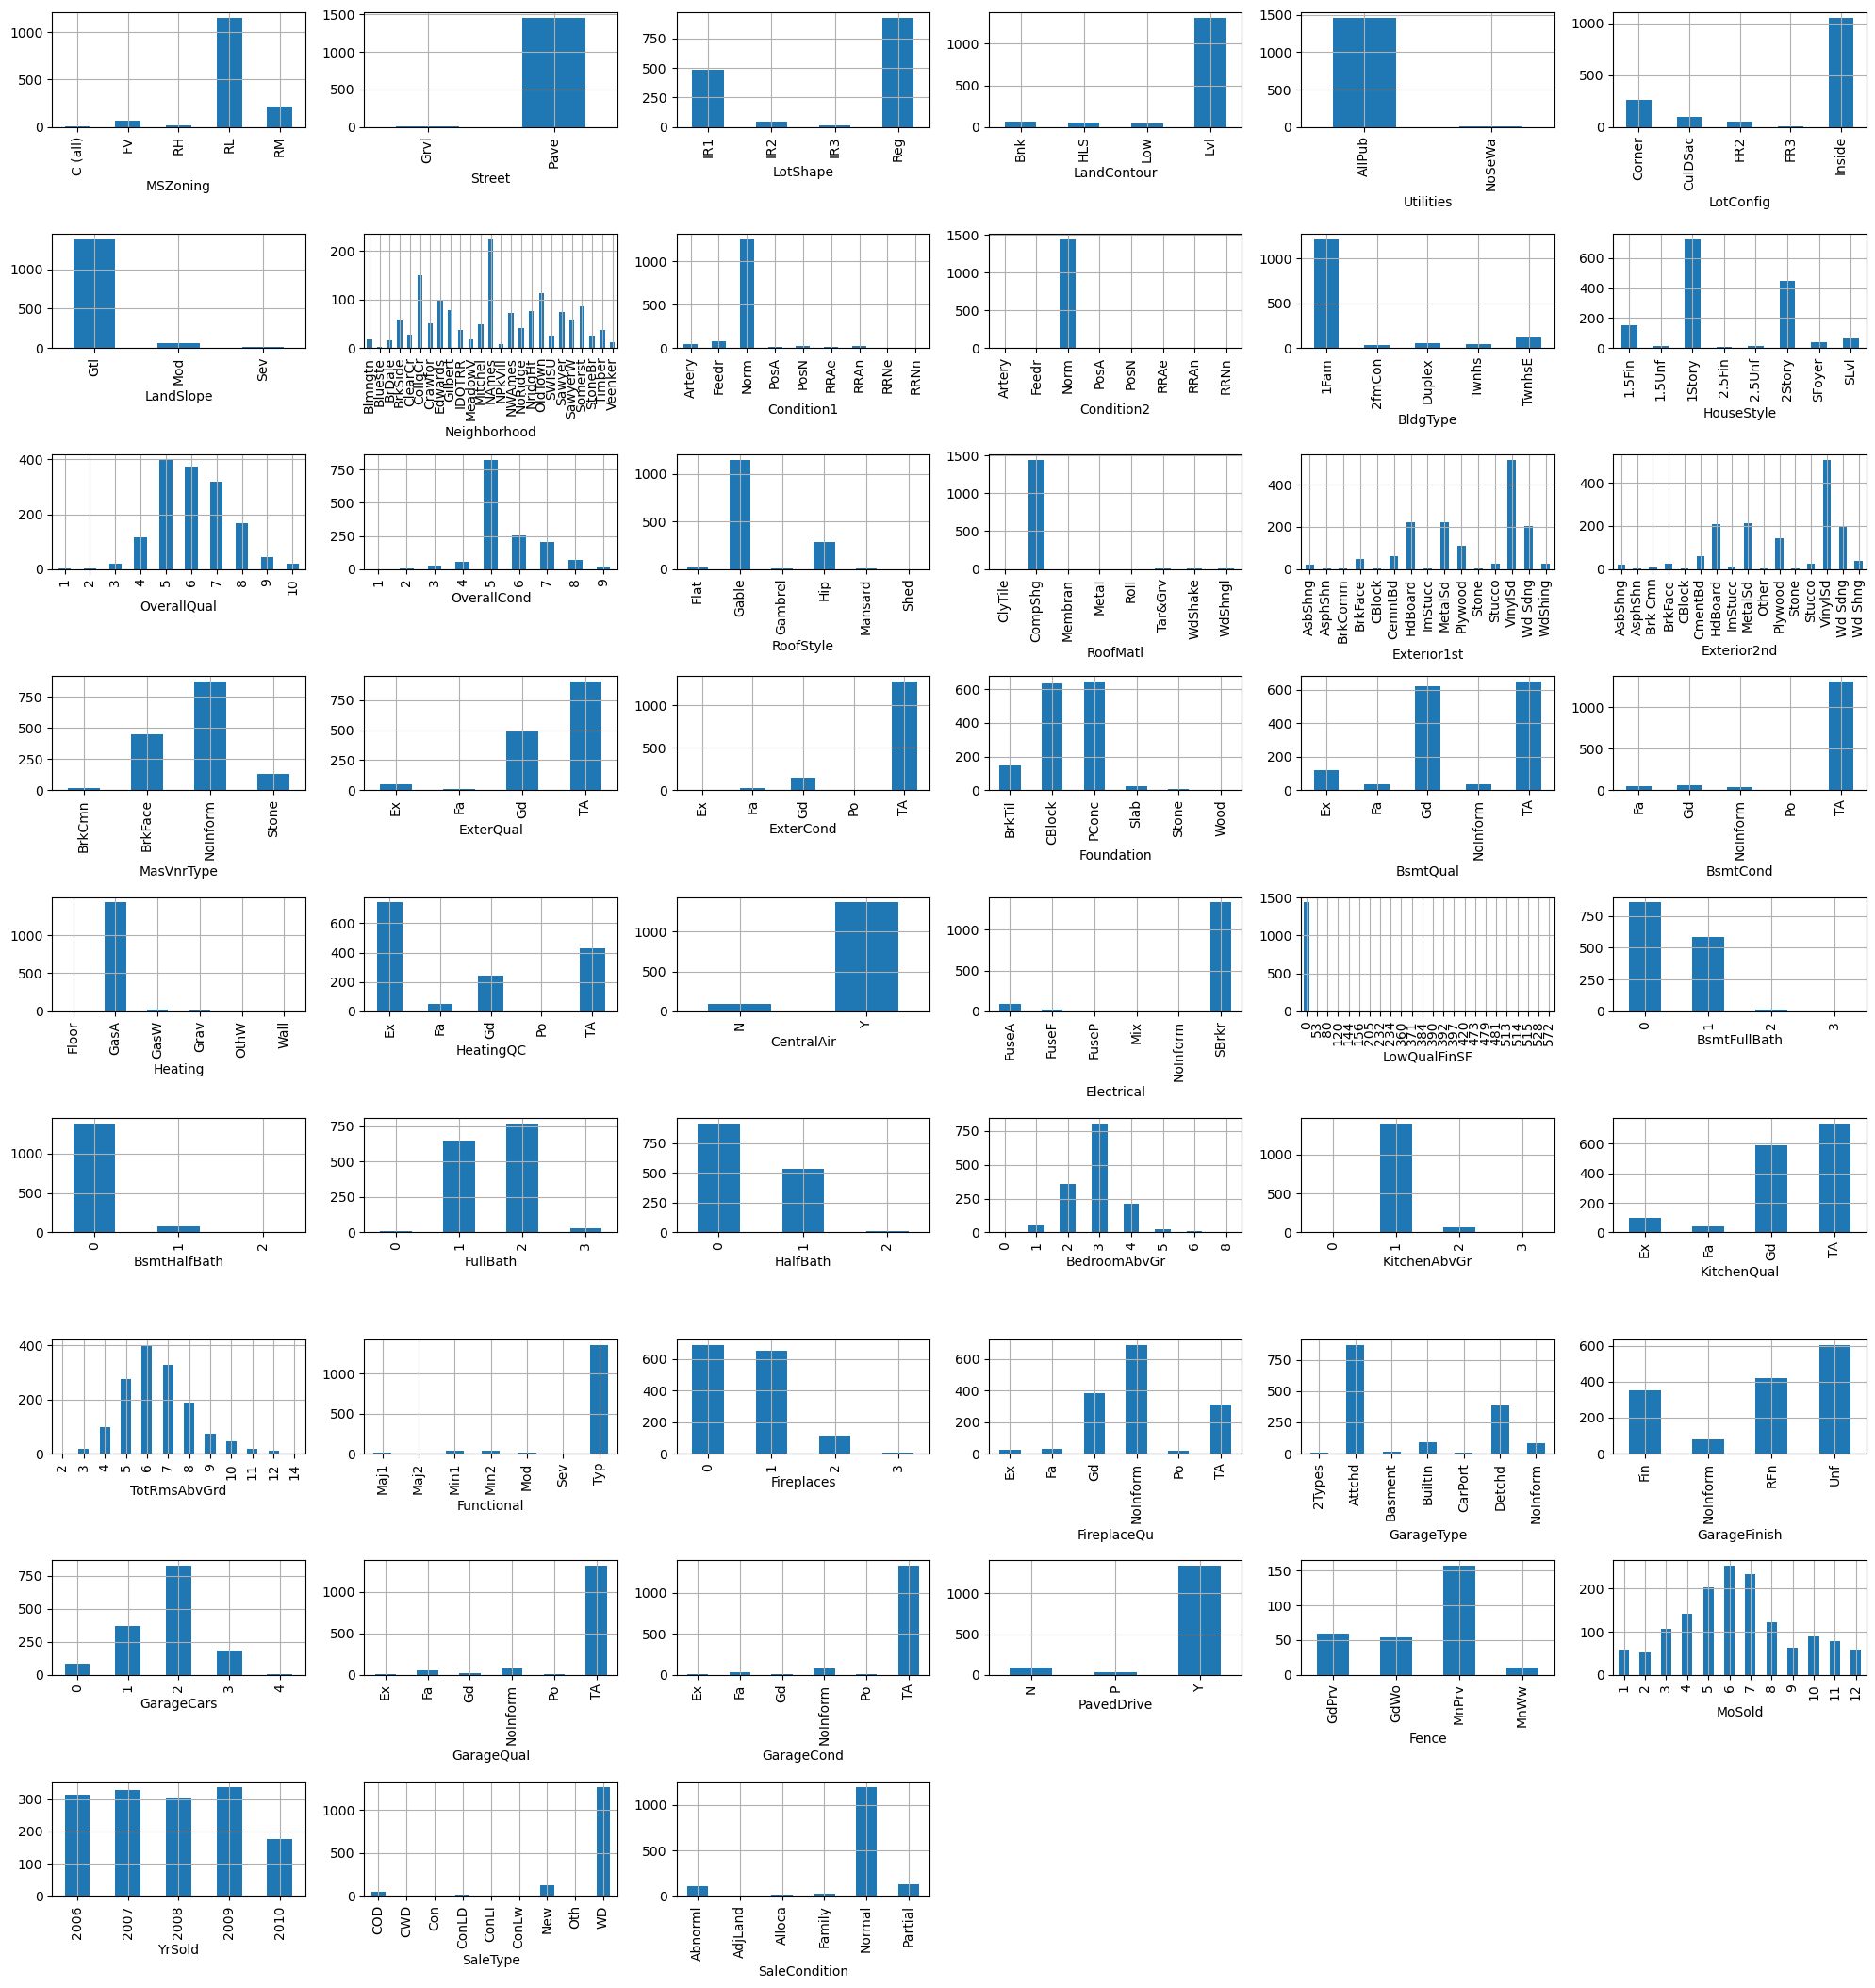

In [37]:
# Построим barplot для дискретных и категориальных признаков

# Создадим подграфики
fig, axes = plt.subplots(11, 6,  figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(cat_col):
    data[col].value_counts().sort_index().plot(kind='bar', ax = axes[i])
    axes[i].grid(True)

# Удаляем пустые графики
for i in range(len(cat_col), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

In [39]:
# Список порядковых категориальных признаков для кодировщика Ordinal encoder
ord_col = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
                 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

# Список остальных категориальных признаков для кодировщика OHE
ohe_col = [col for col in cat_col if col not in ord_col]

# Список вещественных признаков, за исключением целевого
num_col = [col for col in num_col_y if col != 'SalePrice']

ordinal_categories = [
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterQual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterCond
    ['NoInform', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # BsmtQual
    ['NoInform', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # BsmtCond
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # HeatingQC
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # KitchenQual
    ['NoInform', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # FireplaceQu
    ['NoInform', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # GarageQual
    ['NoInform', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']  # GarageCond
]


# Создадим трансформер для колонок с Ordinal encoder, One hot encoding и StandardScaler()
preprocessor = ColumnTransformer(
    transformers = [
        ('ord', OrdinalEncoder(categories=ordinal_categories), ord_col),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe_col),
        ('num', StandardScaler(), num_col)
    ],
    remainder='passthrough'
)

Здесь мы собрали алгоритм обработки признаков, воспользуемся им после разбиения выборки на тестовую и тренировчную - чтобы не проишло утечки данных.

Ordinal encoder используем для порядковых категориальных переменных, OHE используем для всех остальных категориальных переменных

In [43]:
data_corr = data[num_col_y]

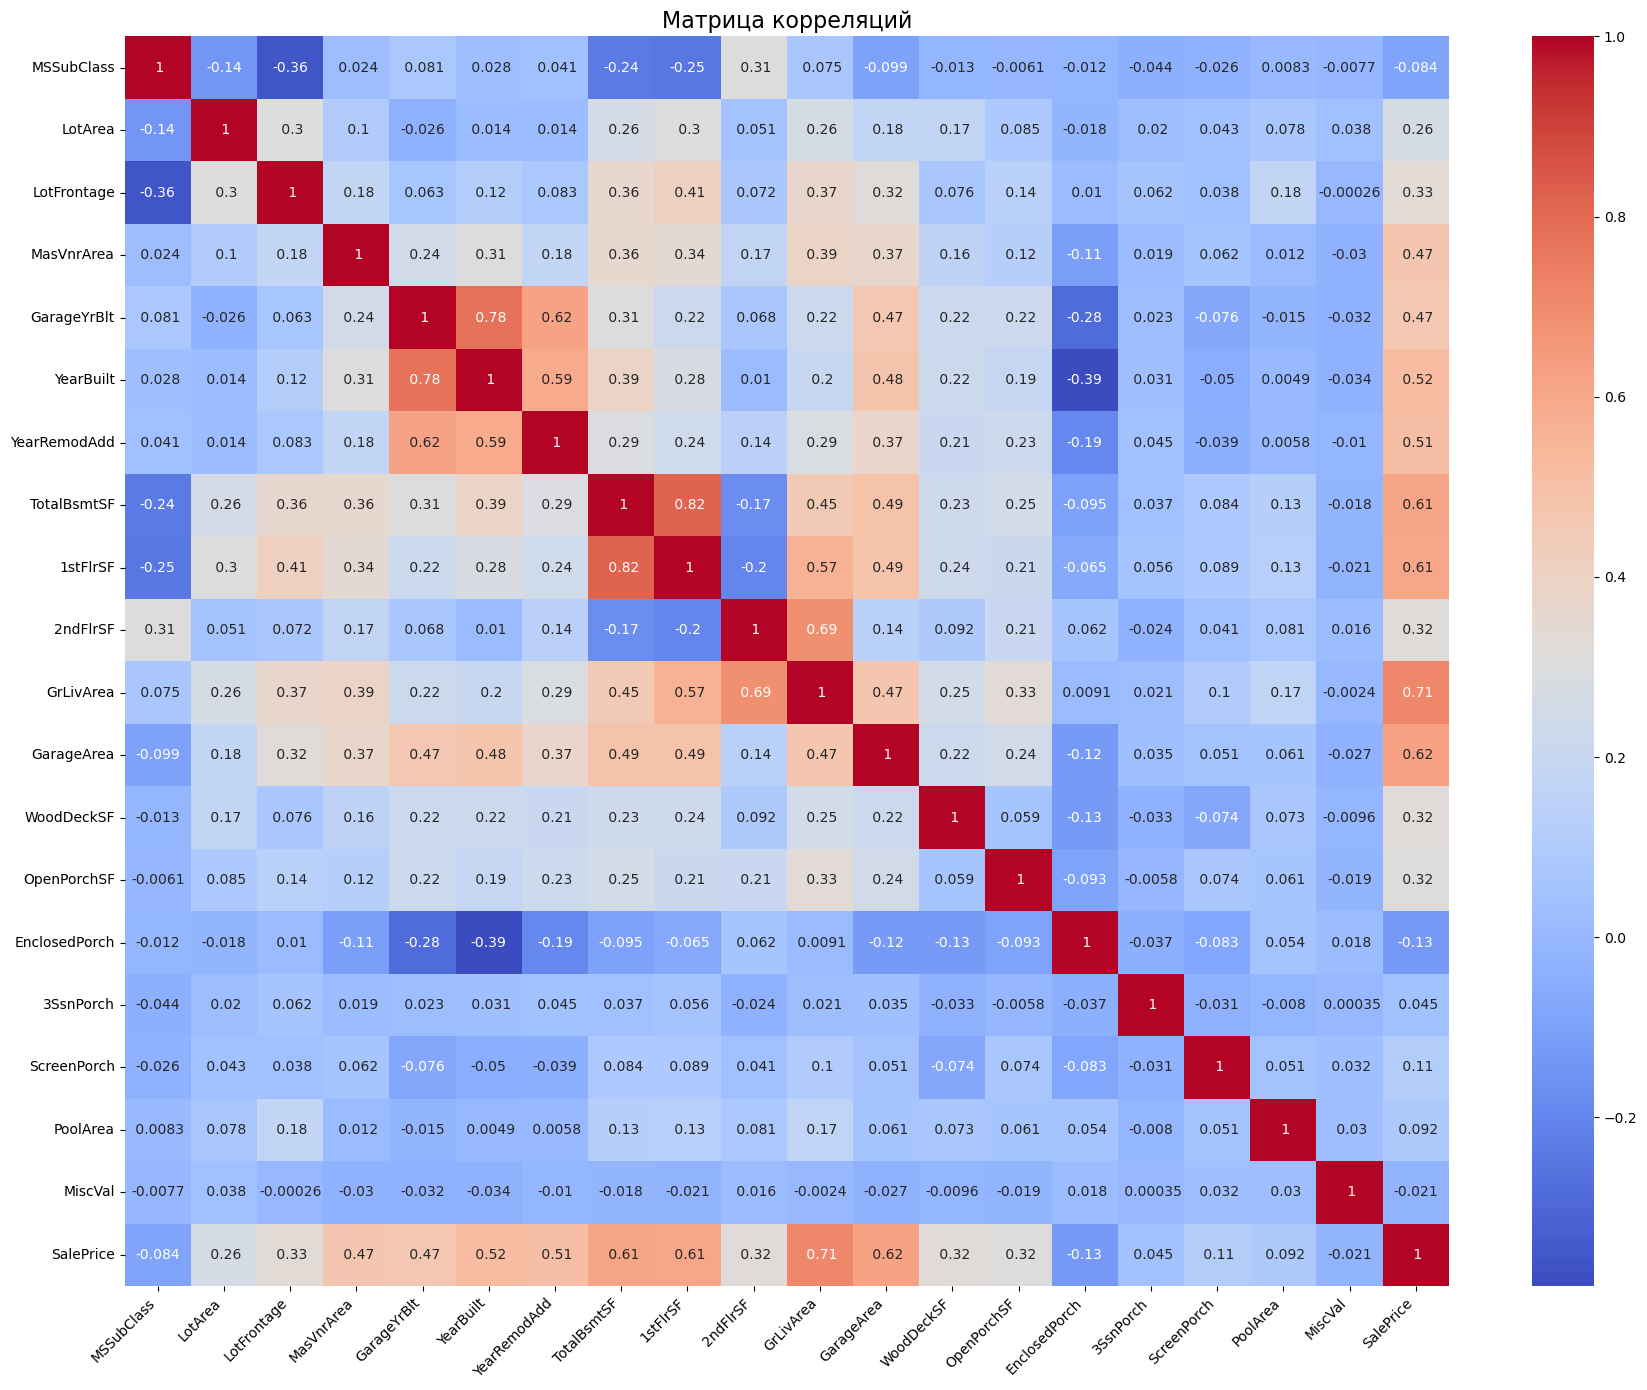

In [44]:
plt.figure(figsize=(18, 14))
sns.heatmap(data_corr.corr(), annot=True, fmt=' .2g', cmap='coolwarm', annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Матрица корреляций', fontsize=16)
plt.tight_layout()
plt.show()

Наиболее сильная корреляция (больше 0.5) между целевым признаком и входными вещественными признаками наблюдается среди:
- GarageArea - площадь гаража
- GrLivArea - жилая площадь
- 1stFlrSF - площадь первого этажа
- TotalBsmtSF - общая площадь подвала
- YearRemodAdd - дата реконструкции
- YearBuilt - год постройки

In [47]:
# Создадим матрицу корреляций с абсолютными значениями
data_corr_matrix = abs(data_corr.corr())

In [48]:
# Оставим столбец с корреляцией по целевому признаку
data_pirson = data_corr_matrix['SalePrice'].sort_values(ascending=False)

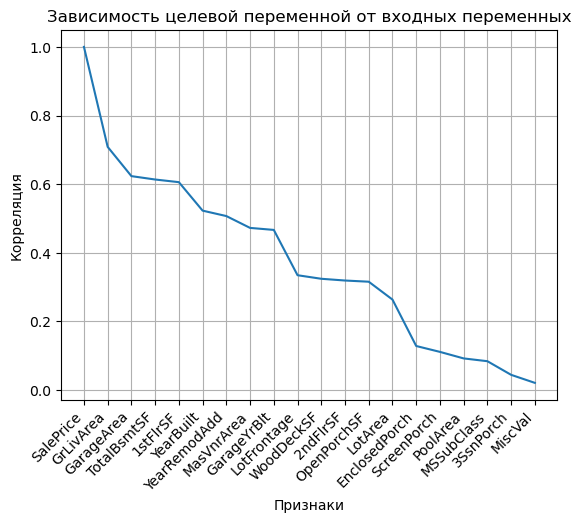

In [49]:
# Изобразим на графике зависиомть найденных признаков от целевого
plt.plot(data_pirson)
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Признаки')
plt.ylabel('Корреляция')
plt.title('Зависимость целевой переменной от входных переменных');

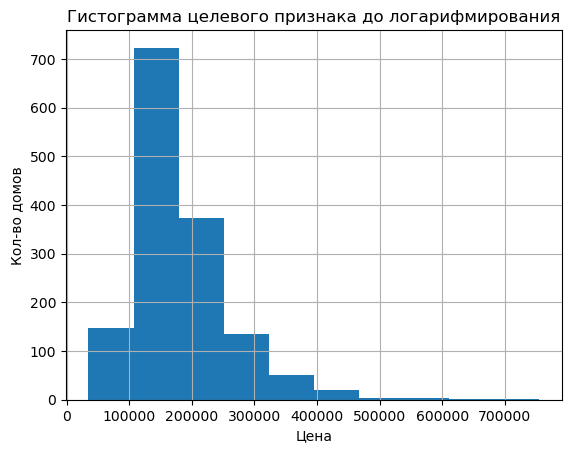

In [51]:
# Гистограмма целевого признака до логарифмирования
data['SalePrice'].hist()
plt.xlabel('Цена')
plt.ylabel('Кол-во домов')
plt.title('Гистограмма целевого признака до логарифмирования');

In [52]:
# Логарифмируем целевой признак
data['SalePrice'] = np.log1p(data['SalePrice'])

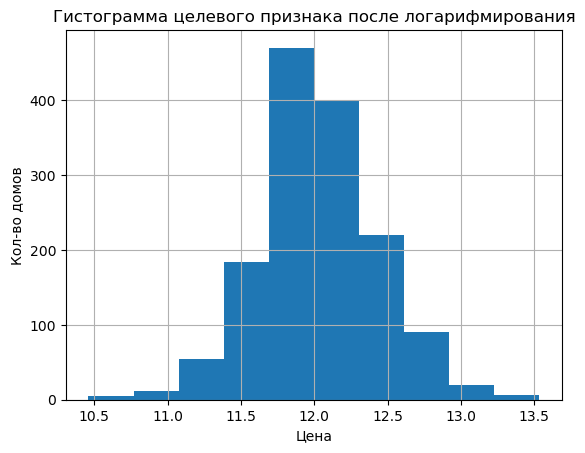

In [53]:
# Гистограмма целевого признака после логарифмирования
data['SalePrice'].hist()
plt.xlabel('Цена')
plt.ylabel('Кол-во домов')
plt.title('Гистограмма целевого признака после логарифмирования');

После логарифмирования, нам удалось сделать распределение признака более 'нормальным' - мы отбросили тонкий хвост из высоких цен справа.

Также, это поможет нам снизить влияние выбросов и усилить линейную зависимость между целевым признаком и входными признаками.

# 3. Обучение модели

In [56]:
# Разбиваем признаки на целевой и входные
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']     

In [57]:
# Разбиваем выборку на тренировчную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [58]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [60]:
# Применим линейную регрессию
lin_reg = LinearRegression()
lin_reg.fit(X_train_transformed, y_train)

LinearRegression()

In [61]:
X_train_transformed

<1095x308 sparse matrix of type '<class 'numpy.float64'>'
	with 75930 stored elements in Compressed Sparse Row format>

In [62]:
# Оценим метрики для линейной регрессии
print('RMSE train:', mean_squared_error(np.expm1(y_train), np.expm1(lin_reg.predict(X_train_transformed)), squared=False))
print('RMSE test:', mean_squared_error(np.expm1(y_test), np.expm1(lin_reg.predict(X_test_transformed)), squared=False))
print('MAE train:', mean_absolute_error(np.expm1(y_train), np.expm1(lin_reg.predict(X_train_transformed))))
print('MAE test:', mean_absolute_error(np.expm1(y_test), np.expm1(lin_reg.predict(X_test_transformed))))
print('R2 train:', r2_score(np.expm1(y_train), np.expm1(lin_reg.predict(X_train_transformed))))
print('R2 test:', r2_score(np.expm1(y_test), np.expm1(lin_reg.predict(X_test_transformed))))

RMSE train: 15307.532409989402
RMSE test: 133263.26397076668
MAE train: 10578.250868957237
MAE test: 24912.947517108845
R2 train: 0.9621862333430442
R2 test: -1.6821669438391171


D:\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Судя по метрикам, можно сказать, что модель переобучена

In [64]:
# Применим Lasso регуляризацию (L1)
#alphas = [0.0001, 0.001, 0.01, 0.1, 10, 100]
alphas = np.arange(0.0001, 0.01, 0.0001)

reg = LassoCV(cv=5, alphas=alphas, random_state=13).fit(X_train_transformed, y_train)

reg_alph = reg.alphas_
array = reg.mse_path_

a=[]
for i in range(len(array)):
    m = np.mean(array[i])
    a.append(m)

d2 = {'MSE_2': pd.Series(a), 'alpha_2': pd.Series(reg_alph)}
df2 = pd.DataFrame(d2)
print(df2)

print("Лучшее значение alpha:", reg.alpha_)

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12168673548918996, tolerance: 0.01384998620523727
  model = cd_fast.sparse_enet_coordinate_descent(


       MSE_2  alpha_2
0   0.020880   0.0099
1   0.020858   0.0098
2   0.020836   0.0097
3   0.020813   0.0096
4   0.020790   0.0095
..       ...      ...
94  0.013644   0.0005
95  0.013689   0.0004
96  0.013795   0.0003
97  0.014110   0.0002
98  0.014819   0.0001

[99 rows x 2 columns]
Лучшее значение alpha: 0.0005


Наименьшая ошибка наблюдается при alpha = 0.0005 - остановимся на нем

In [66]:
lasso = linear_model.Lasso(alpha=0.0005)
lasso.fit(X_train_transformed, y_train)

Lasso(alpha=0.0005)

In [67]:
# Оценим метрики для линейной регрессии с применением Лассо регуляризации
print('RMSE train:', mean_squared_error(np.expm1(y_train), np.expm1(lasso.predict(X_train_transformed)), squared=False))
print('RMSE test:', mean_squared_error(np.expm1(y_test), np.expm1(lasso.predict(X_test_transformed)), squared=False))
print('MAE train:', mean_absolute_error(np.expm1(y_train), np.expm1(lasso.predict(X_train_transformed))))
print('MAE test:', mean_absolute_error(np.expm1(y_test), np.expm1(lasso.predict(X_test_transformed))))
print('R2 train:', r2_score(np.expm1(y_train), np.expm1(lasso.predict(X_train_transformed))))
print('R2 test:', r2_score(np.expm1(y_test), np.expm1(lasso.predict(X_test_transformed))))

RMSE train: 17701.28456196202
RMSE test: 122005.18193620595
MAE train: 12326.76214057996
MAE test: 23681.33622157328
R2 train: 0.9494351023879981
R2 test: -1.2481302398075407


D:\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Судя по метрикам, можно сказать, что модель переобучена

In [69]:
# Применим Ridge регуляризацию (L2)
#alphas = [0.01, 0.1, 1, 2, 5, 7, 10, 15, 100]
alphas = np.arange(2, 7, 0.1)

reg = RidgeCV(cv=5, alphas=alphas).fit(X_train_transformed, y_train)

print("Лучшее значение alpha:", reg.alpha_)

Лучшее значение alpha: 5.000000000000003


Наименьшая ошибка наблюдается при alpha = 5.6 - остановимся на нем

In [71]:
ridge = linear_model.Ridge(alpha=5.6)
ridge.fit(X_train_transformed, y_train)

Ridge(alpha=5.6)

In [72]:
# Оценим метрики для линейной регрессии с применением Ридж регуляризации
print('RMSE train:', mean_squared_error(np.expm1(y_train), np.expm1(ridge.predict(X_train_transformed)), squared=False))
print('RMSE test:', mean_squared_error(np.expm1(y_test), np.expm1(ridge.predict(X_test_transformed)), squared=False))
print('MAE train:', mean_absolute_error(np.expm1(y_train), np.expm1(ridge.predict(X_train_transformed))))
print('MAE test:', mean_absolute_error(np.expm1(y_test), np.expm1(ridge.predict(X_test_transformed))))
print('R2 train:', r2_score(np.expm1(y_train), np.expm1(ridge.predict(X_train_transformed))))
print('R2 test:', r2_score(np.expm1(y_test), np.expm1(ridge.predict(X_test_transformed))))

RMSE train: 16668.543952016294
RMSE test: 113545.55600721725
MAE train: 11631.499450263926
MAE test: 23525.211888588165
R2 train: 0.9551631706494875
R2 test: -0.9471759470365406


D:\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Судя по метрикам, можно сказать, что модель переобучена

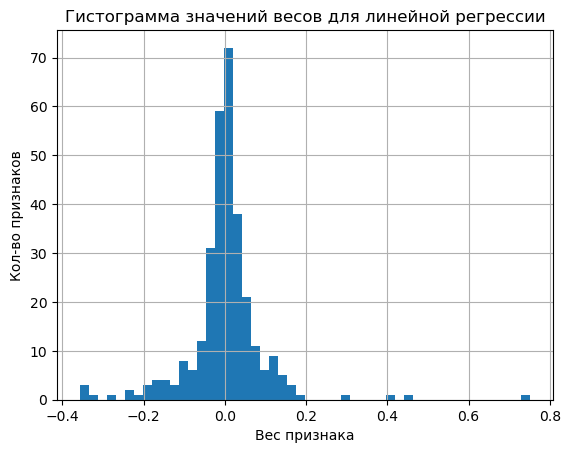

In [75]:
# Построим гистогамму значений весов для линейной регрессии
feature_names = preprocessor.get_feature_names_out()
coef_df = pd.DataFrame(lin_reg.coef_, index=feature_names, columns = ['coef'])
coef_df.sort_values(by=['coef']).hist(bins=50)
plt.xlabel('Вес признака')
plt.ylabel('Кол-во признаков')
plt.title('Гистограмма значений весов для линейной регрессии');

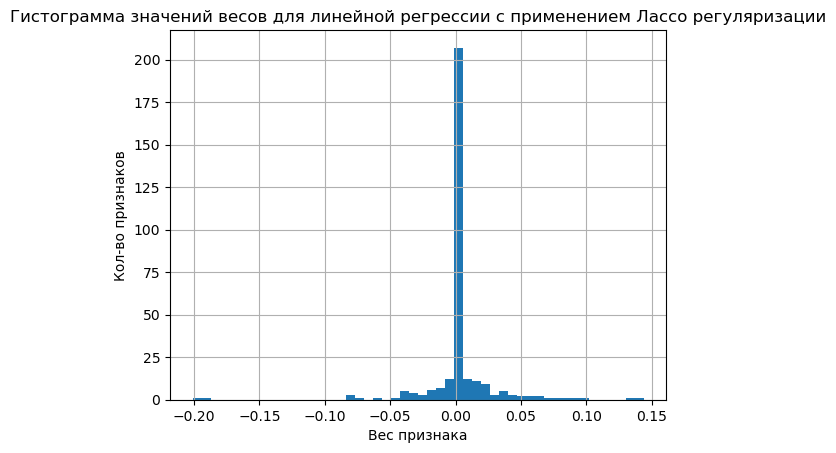

In [76]:
# Построим гистогамму значений весов для линейной регрессии с применением Лассо регуляризации
coef_df = pd.DataFrame(lasso.coef_, index=feature_names, columns = ['coef'])
coef_df.sort_values(by=['coef']).hist(bins=50)
plt.xlabel('Вес признака')
plt.ylabel('Кол-во признаков')
plt.title('Гистограмма значений весов для линейной регрессии с применением Лассо регуляризации');

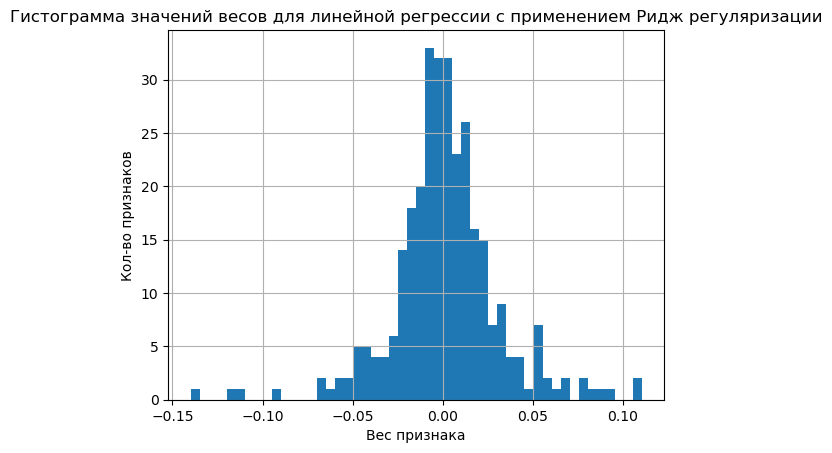

In [77]:
# Построим гистогамму значений весов для линейной регрессии с применением Ридж регуляризации
coef_df = pd.DataFrame(ridge.coef_, index=feature_names, columns = ['coef'])
coef_df.sort_values(by=['coef']).hist(bins=50)
plt.xlabel('Вес признака')
plt.ylabel('Кол-во признаков')
plt.title('Гистограмма значений весов для линейной регрессии с применением Ридж регуляризации');

- Лассо регуляризация обнулила большое кол-во весов - порядка 200 штук.
- Ридж регуляризация снизила значимость весов - больше нет выбросов в правом хвосте